In [1]:
import staircase as sc
import operator
import warnings

from imports import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hotstepper as hs
from hotstepper import Steps, Step
from hotstepper.utilities import get_epoch_start,date_to_float_bulk
from hotstepper import Bases, Basis

import hotstepper.samples as samples

warnings.filterwarnings("ignore")


In [2]:
hs.utilities.is_date_time(pd.Timestamp(2020))

True

In [3]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps(use_datetime=True).add_direct(df.enter,df.leave)
queue = sc.Stairs(use_dates=True).layer(df.enter,df.leave)
#queue = queue.clip(upper=pd.Timestamp(2020,3,1))

In [4]:
%%timeit -r 3 -n 3
vsteps = Steps(use_datetime=True).add_direct(df.enter,df.leave)

9.42 ms ± 1.35 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [5]:
%%timeit -r 3 -n 3
queue = sc.Stairs(use_dates=True).layer(df.enter,df.leave)

9.34 ms ± 1.73 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


[<AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>,
 <AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>,

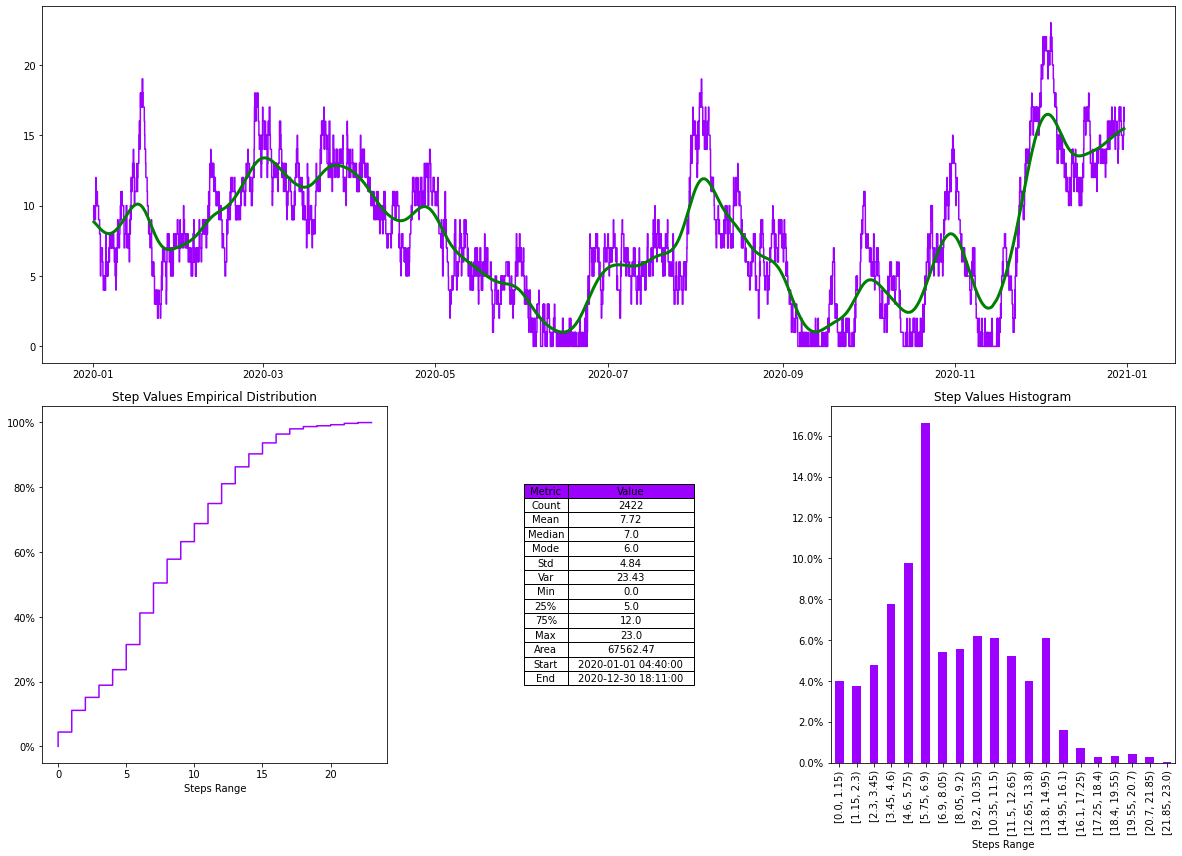

In [6]:
vsteps.summary()

<AxesSubplot:>

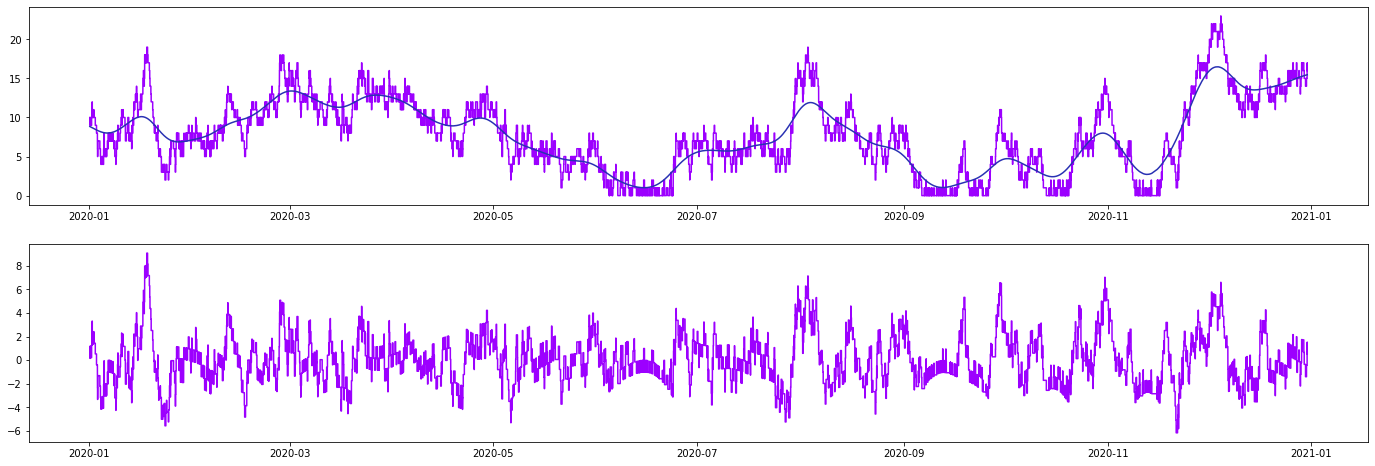

In [22]:
#p = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,3,1),pd.Timedelta(hours=1)).astype(pd.Timestamp)

fig,(ax,ax2) = plt.subplots(nrows=2,figsize=(24,8))

#vsteps = vsteps.clip(ubound=pd.Timestamp(2020,3,1))
vsteps_smooth = vsteps.copy()
vsteps_smooth.rebase(Basis(Bases.logit))
#vsteps.rebase()
vsteps.plot(ax=ax)
vsteps_smooth.smooth_plot(ax=ax)

delta_steps = vsteps - vsteps_smooth
delta_steps.plot(ax=ax2)


<AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>

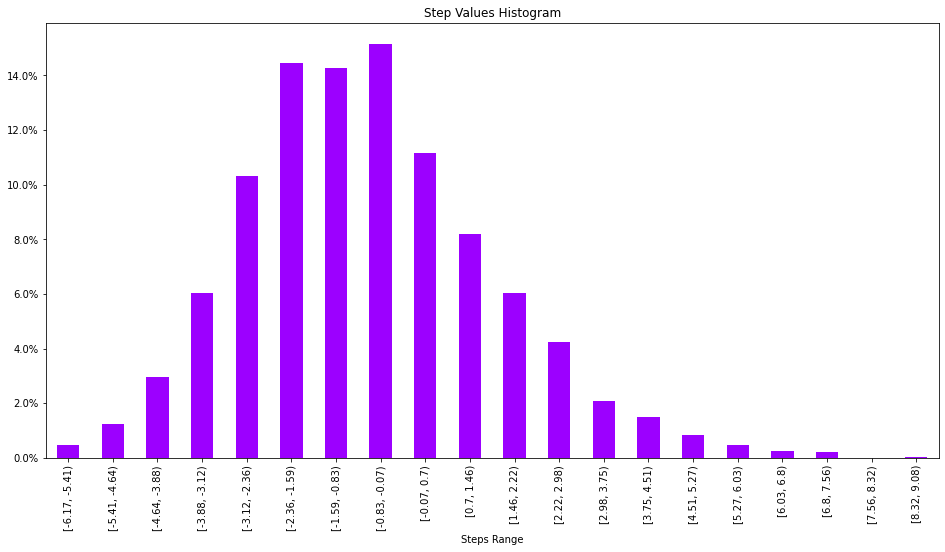

In [8]:
delta_steps.histogram_plot()

<AxesSubplot:>

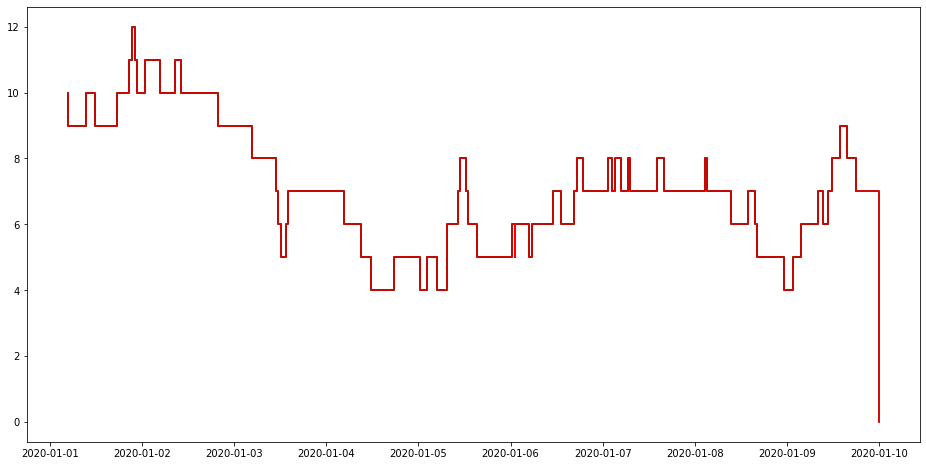

In [9]:
clip_step_end = Step(end=pd.Timestamp(2020,1,10))
steps_end = Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = Step(start=pd.Timestamp(2020,5,1))

ax = vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(color='g')
(vsteps*clip_step_end).plot(ax=ax,color='black')
(vsteps*steps_end).plot(ax=ax,color='r')


<AxesSubplot:>

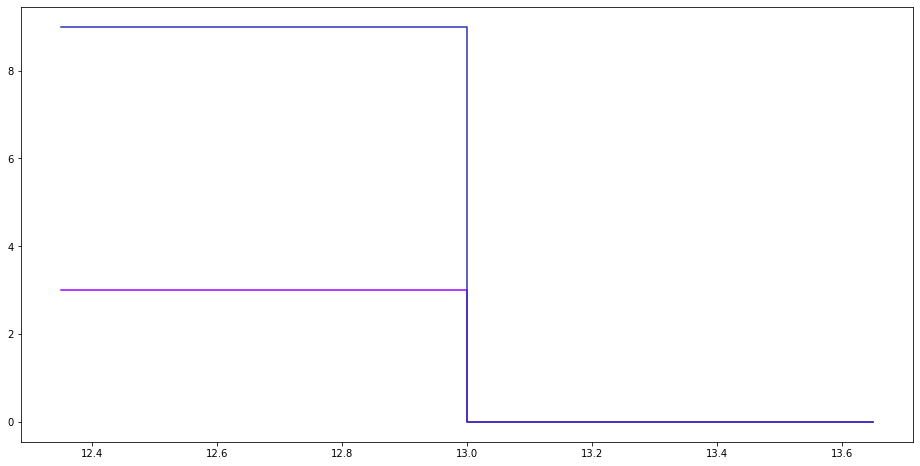

In [23]:
s3 = Step(end=13,weight=3)
#s3.step([get_epoch_start(False),14])
ax = s3.plot(method='function')
(s3*s3).plot(ax=ax)

[<AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>,
 <AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>,

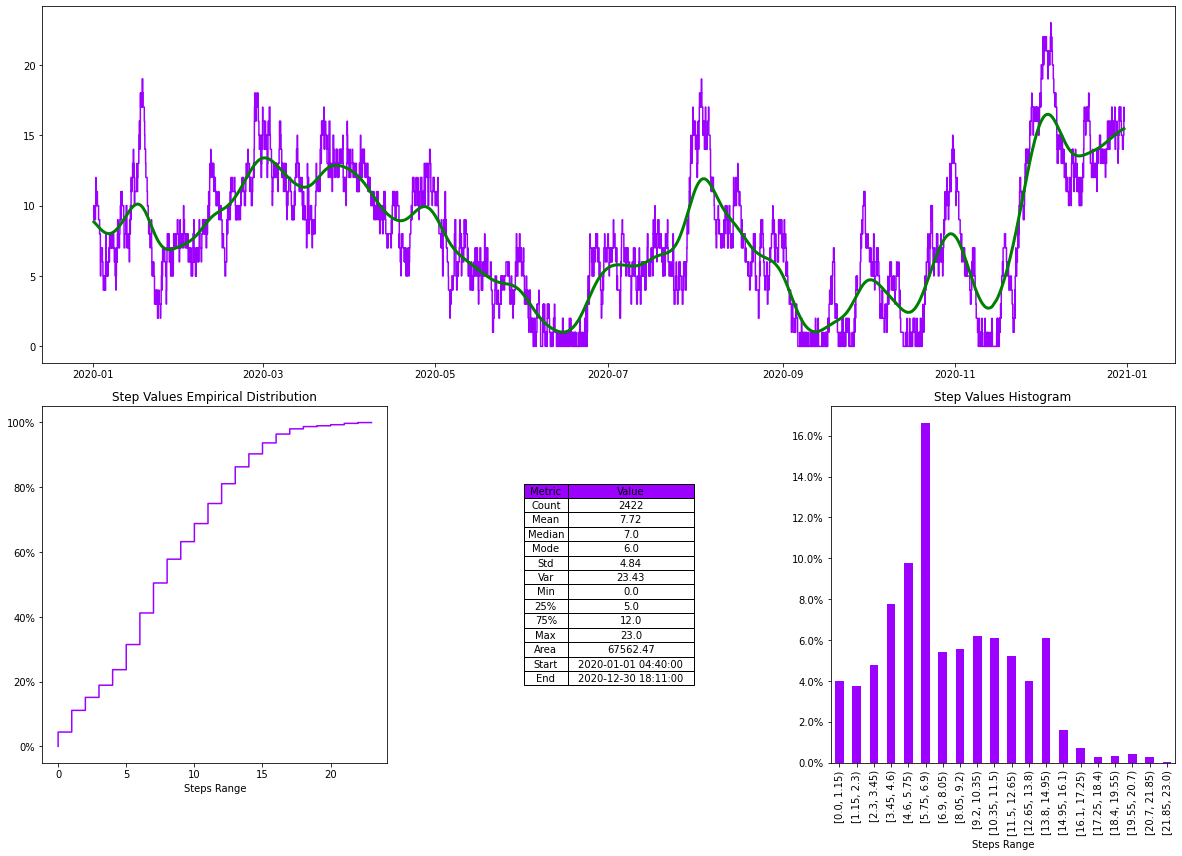

In [11]:
vsteps.summary()

<AxesSubplot:>

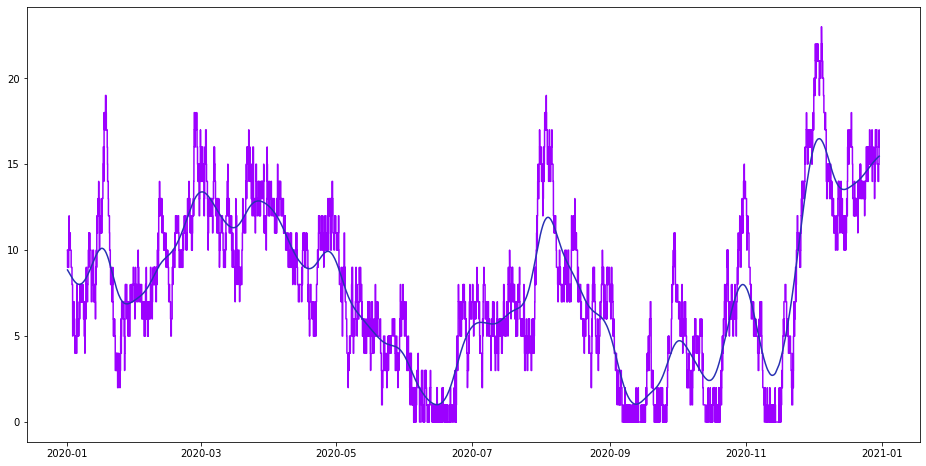

In [24]:
ax = vsteps.plot()
vsteps.smooth_plot(ax=ax)

In [13]:
from hotstepper.utilities.helpers import prepare_input
p = np.arange(vsteps.first(),vsteps.last(),pd.Timedelta(minutes=10)).astype(pd.Timestamp)
p3 = np.arange(vsteps.first().to_numpy(), vsteps.last().to_numpy(),np.timedelta64(10, 'm'),dtype='datetime64[ns]')
p2 = np.arange(vsteps.first(),vsteps.last(),pd.Timedelta(minutes=10)).astype(float)

In [14]:
%%timeit -r 5 -n 5
vsteps.fast_step(p)

53 ms ± 1.85 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [15]:
%%timeit -r 5 -n 5
queue(p)

220 ms ± 45.4 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


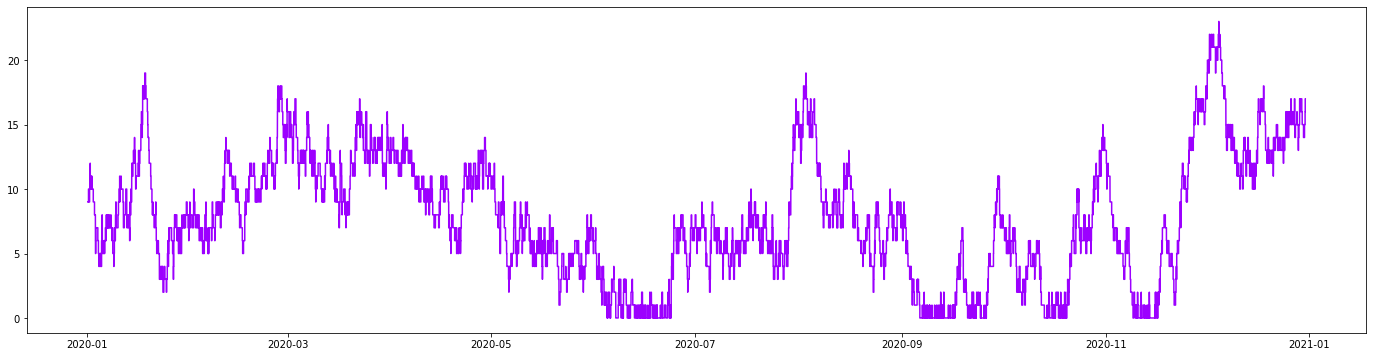

In [16]:
fig,ax = plt.subplots(figsize=(24,6))

ax.step(p,vsteps[p])

In [17]:
origin = pd.to_datetime("1970-1-1")

d = np.datetime64('1980-01-01T10:12')

fd = (d - origin.tz_localize(None)) / pd.Timedelta(1, "s")
fd

315569520.0

In [18]:
fd*pd.Timedelta(1, "s") + origin

Timestamp('1980-01-01 10:12:00')

In [19]:
vsteps[vsteps.first():vsteps.last():pd.Timedelta(minutes=10)]

array([ 9.,  9.,  9., ..., 16., 17., 17.])

In [20]:
vsteps.fast_step(p,side='left')

array([10.,  9.,  9., ..., 16., 17., 17.])

In [21]:
import datetime
#print(get_ts(datetime.datetime(1980,1,1,10,12)),'\n',get_ts(pd.Timestamp(1980,1,1,10,12)))
print(date_to_float_bulk(datetime.datetime(1980,1,1,10,12)),'\n',date_to_float_bulk(pd.Timestamp(1980,1,1,10,12)))

print(date_to_float_bulk(np.datetime64('nat')),'\n',date_to_float_bulk(pd.Timestamp(1980,1,1,10,12)))


315569520.0 
 315569520.0
nan 
 315569520.0
